### **Cats and Dogs Classification Fine Tuning with Tensorflow**
---

      1.   Downloading Dataset and Loading Data into Train and Validation directories:

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

--2024-11-02 04:51:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   226MB/s    in 0.3s    

2024-11-02 04:51:45 (226 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



      2.   Splitting Data into Train and Validation sets:

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=8)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  validation_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150, 150),
  batch_size=8)

print(f"Classes: {train_ds.class_names}")

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.
Classes: ['cats', 'dogs']


      3.   Importing and Preparing Model for Fine Tuning:

In [ ]:
resnet_model = tf.keras.Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(150, 150, 3),
    pooling='avg',
    weights='imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(tf.keras.layers.InputLayer(input_shape=(150, 150, 3)))
resnet_model.add(pretrained_model)
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dense(2, activation='softmax'))

resnet_model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,637,826 (93.99 MB)

 Trainable params: 1,050,114 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

      4.   Compiling Model:

In [ ]:
resnet_model.compile(optimizer="adam",
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

      5.   Training|Fine Tuning Model:

In [ ]:
epochs = 10

history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 165s 826ms/step - accuracy: 0.9479 - loss: 0.2830 - val_accuracy: 0.9300 - val_loss: 0.1579
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 203s 829ms/step - accuracy: 0.9755 - loss: 0.0604 - val_accuracy: 0.9300 - val_loss: 0.1815
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 209s 865ms/step - accuracy: 0.9714 - loss: 0.0678 - val_accuracy: 0.9200 - val_loss: 0.2564
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 195s 832ms/step - accuracy: 0.9916 - loss: 0.0238 - val_accuracy: 0.9300 - val_loss: 0.2565
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 200s 822ms/step - accuracy: 0.9986 - loss: 0.0123 - val_accuracy: 0.9500 - val_loss: 0.1916
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 201s 820ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.9450 - val_loss: 0.2009
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 198s 801ms/step - accuracy: 0.9963 - loss: 0.0074 - val_accuracy: 0.9450 - val_loss: 0.1818
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 167s 837ms/step - accuracy: 1.0000 -

      6.   Visualizing Model Accuracy during Training:

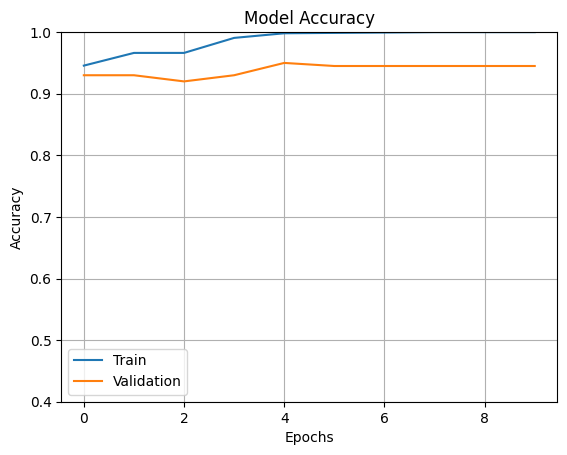

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

      7.   Visualizing Model Loss History:

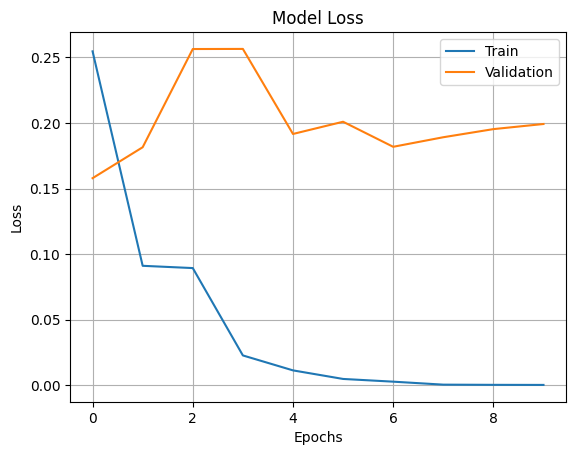

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

      8.   Making Predictions with Trained Model:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


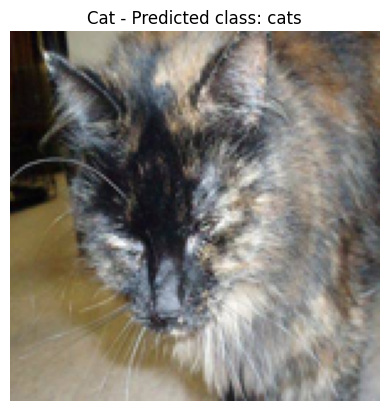

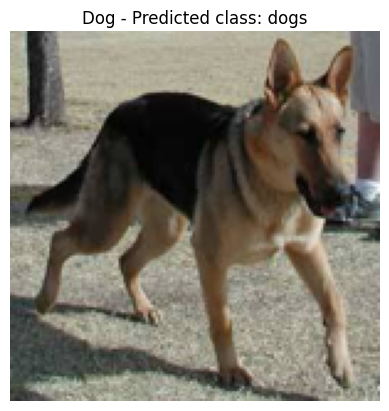

In [ ]:
cat_dir = os.path.join(validation_dir, 'cats')
dog_dir = os.path.join(validation_dir, 'dogs')

cat_images = os.listdir(cat_dir)
dog_images = os.listdir(dog_dir)

cat_image_path = os.path.join(cat_dir, cat_images[0])
dog_image_path = os.path.join(dog_dir, dog_images[0])

def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

cat_image = load_and_preprocess_image(cat_image_path)
dog_image = load_and_preprocess_image(dog_image_path)

cat_pred_class = train_ds.class_names[np.argmax(resnet_model.predict(cat_image))]
dog_pred_class = train_ds.class_names[np.argmax(resnet_model.predict(dog_image))]

def display_image(image, pred_class, title):
    plt.imshow(image[0])
    plt.title(f'{title} - Predicted class: {pred_class}')
    plt.axis('off')
    plt.show()

display_image(cat_image, cat_pred_class, 'Cat')
display_image(dog_image, dog_pred_class, 'Dog')